# Bootcamp: Convolutional Neural Networks        (CNNs)

PEND TO STUDY IT AGAIN!!!

In [1]:
!pip install -r requirements.txt --user --upgrade

    100% |████████████████████████████████| 9.5MB 2.7MB/s ta 0:00:011
    100% |████████████████████████████████| 13.4MB 2.1MB/s ta 0:00:01   33% |██████████▉                     | 4.5MB 3.5MB/s eta 0:00:03    60% |███████████████████▌            | 8.2MB 4.4MB/s eta 0:00:02    78% |█████████████████████████       | 10.4MB 4.2MB/s eta 0:00:01    96% |██████████████████████████████▊ | 12.8MB 3.7MB/s eta 0:00:01
    100% |████████████████████████████████| 11.6MB 3.0MB/s ta 0:00:011    87% |████████████████████████████▏   | 10.2MB 17.7MB/s eta 0:00:01    98% |███████████████████████████████▋| 11.5MB 5.3MB/s eta 0:00:01
Requirement already up-to-date: tensorflow in /opt/conda/lib/python3.6/site-packages (from -r requirements.txt (line 4)) (1.14.0)
Requirement already up-to-date: keras in /opt/conda/lib/python3.6/site-packages (from -r requirements.txt (line 5)) (2.4.3)
    100% |████████████████████████████████| 163kB 6.1MB/s ta 0:00:01
    100% |████████████████████████████████| 2.2MB 3.9M

In [2]:
from scipy import ndimage as nd

## Goals

So far, we've learned about Neural Networks and how they can be really useful when dealing with large structured datasets with highly nonlinear relationships. 

In order to be able to handle more complex data like images or video; it's necessary to introduce a particular type of neural network architecture, the **convolutional neural network**. The main goal in this case, is to achive understanding of the concept and related terms. It is also expected to deliver tools that can be useful for further implementation of a CNN using Python.

## 1. Neural Networks

**Neural Networks prior knowledge** 

What is a Neural Network?

A neural network is a series of algorithms that endeavors to recognize underlying relationships in a set of data through a process that mimics the way the human brain operates.

The inner workings of the algorithm take inputs on the left-hand side to provide outputs on the right-hand side by multiplying each layer by the edges between neurons to get the next layer. Then, the algorithm uses multivariable calculus (in a process known as gradient descent) to optimize each edge:

<img src="data/images/deep_net.png" width="300" height="300" />

How do we make good or bad choices within the network? We compare the outputs of the predictions (using the loss function), and make tiny changes to compare the outputs. Most frequently, we use a learning rate and a gradient descent method to estimate the changes that our successive models have used.

It's important to be familiar with the following terms:

1. **optimizer**: The optimization algorithm used to update weights in neural network training. A common optimizer is stochastic gradient descent (SGD).
1. **learning rate**:The influence of the gradient in updating the weights of the neural network at each step. Smaller values correspond to smaller (slower) updates; the default in `SGD` of `keras` is 0.01.
1. **loss function**: The function that determines how to evaluate predictions from the model against the labeled data. A common loss function is [mean squared error](https://keras.io/api/losses/regression_losses/#mean_squared_error-function).
1. **epochs**: Refers to one cycle through the full training dataset.

## 2. What is Convolution?

In mathematics, convolution is an operation on two functions (f and g) that produces a third function expressing how the shape of one is modified by the other.

Convolution has applications that include probability, statistics, computer vision, natural language processing, image and signal processing, engineering, and differential equations.

Our particular interest is to use a convolution that extracts patterns from an image. You probably know how an image can be represented as a large matrix of numbers (pixels). A convolution consists of passing a smaller matrix, called a **convolutional filter** (or **kernel**), over this matrix. Here is a demonstration of how the filter is applied with a kernel [1 0 1; 0 1 0; 1 0 1]:

<img src=data/images/convolution_schematic.gif width="400">

Source: [WildML](http://www.wildml.com/2015/11/understanding-convolutional-neural-networks-for-nlp/).

Convolution is important for image handling because it allows to extract features from it. This means that by using pooling and convolution, we will be able to reduce the dimensions of the data we are processing for prediction or modeling using Neural Networks.

## 3. What is a Convulational Neural Network?

A Convolutional Neural Network (CNN) is a Neural Network based Deep Learning algorithm which when applied to an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and is able to differentiate one from the other.

For example, if our original input images were of dimensions 200x200x3 (width, height, depth respectively), where the depth refers to the 3 RGB color channels, the neurons in a layer would only be connected to a small region of the layer before it, instead of all of the neurons:

<img src=data/images/CNN_Main.jpeg width="550">
<img src=data/images/CNN_Graph.jpeg width="550">

### Python Convolution



Image shape: (200, 200, 4)


(-0.5, 798.5, 199.5, -0.5)

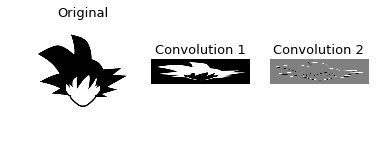

In [4]:
# import required libraries 
import numpy as np 
import matplotlib.image as img
import matplotlib.pyplot as plt
import pandas as pd

# Read an image 
imageMat = img.imread('data/images/goku.png')

# Shape of the image
print("Image shape:", imageMat.shape) 

# Reshape
imageMat_reshape = imageMat.reshape(imageMat.shape[0], -1)

# Export the image to a CSV file
mat_df = pd.DataFrame(imageMat_reshape)
mat_df.to_csv('data/goku.csv', 
              header = None, 
              index = None) 


# Load the CSV file
loaded_df = pd.read_csv('data/goku.csv',  
                        sep = ',', 
                        header = None) 

loaded_2D_mat = loaded_df.values 

all_imgs = np.asfarray(loaded_2D_mat[:, 1:])

# Reshape
img = all_imgs.reshape(200, 799)

# Filters
conv_filter = np.array([[1,1,1,1], [1,1,1,1], [1,1,1,1], [1,1,1,1]])
conv_filter2 = np.array([[1,1,1,1], [0,0,0,0], [0,0,0,0], [-1,-1,-1,-1]])

image_new = nd.convolve(img, conv_filter)
image_new2 = nd.convolve(img, conv_filter2)

# Images
fig, axes = plt.subplots(1, 3)
axes[0].imshow(imageMat, cmap=plt.cm.gray)
axes[0].set_title("Original", fontsize=13)
axes[0].axis("off")

axes[1].imshow(image_new, cmap=plt.cm.gray)
axes[1].set_title("Convolution 1", fontsize=13)
axes[1].axis("off")

axes[2].imshow(image_new2, cmap=plt.cm.gray)
axes[2].set_title("Convolution 2", fontsize=13)
axes[2].axis("off")

## 4. CNN Python implementation

We are going to use tensorflow package (Tensorflow is an end-to-end open source platform for machine learning) to implement a CNN in Python, for further investigation, check [here](https://www.tensorflow.org/).

First, we get the necesary libraries:

In [4]:
!pip install numpy --upgrade

Requirement already up-to-date: numpy in /home/jovyan/.local/lib/python3.6/site-packages (1.19.2)


In [5]:
import tensorflow as tf
import warnings

warnings.filterwarnings('ignore')

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

We are going to work with the CIFAR10 dataset which contains 60.000 color images in 10 classes, with 6.000 images in each class. The dataset is divided into 50.000 training images and 10.000 testing images. So, it's necessary to download and process this data.

Used code and the idea to use CIFAR10 dataset comes from [here](https://www.tensorflow.org/tutorials/images/cnn).

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


170500096/170498071 [==============================] - 49s 0us/step


**Verify the images**

To check that the dataset is OK, we are going to display the first 20 images from the training set and show the class of each one of them.  

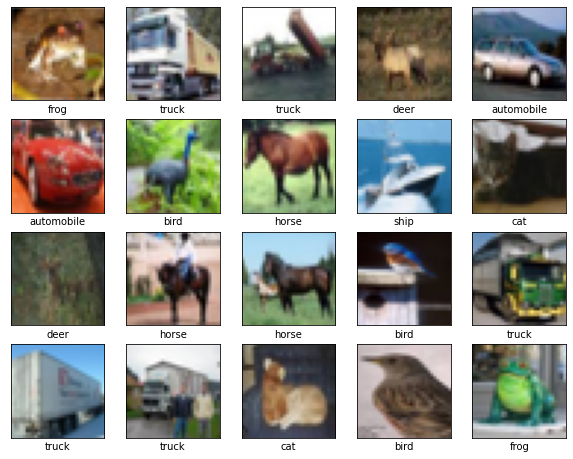

In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


**Convolutional Layers**

The following code defines the convolutional stack of Conv2D and MaxPooling2D layers.

As input, a CNN takes an input of shape (image_height, image_width, color_channels). In this example, we will configure a CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images.

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()



Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


**Add Dense layers**

To complete the network architecture, you will feed the last output from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take 1D vectors as input, while the current output is 3D. First, you will flatten the 3D output to 1D, then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs and a relu activation function.

In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

**Train the model**

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 63s 1ms/sample - loss: 1.5146 - acc: 0.4465 - val_loss: 1.2698 - val_acc: 0.5418
Epoch 2/10
50000/50000 [==============================] - 52s 1ms/sample - loss: 1.1563 - acc: 0.5918 - val_loss: 1.0972 - val_acc: 0.6134
Epoch 3/10
50000/50000 [==============================] - 55s 1ms/sample - loss: 1.0116 - acc: 0.6438 - val_loss: 1.0047 - val_acc: 0.6470
Epoch 4/10
50000/50000 [==============================] - 45s 891us/sample - loss: 0.9167 - acc: 0.6787 - val_loss: 0.9772 - val_acc: 0.6555
Epoch 5/10
50000/50000 [==============================] - 48s 953us/sample - loss: 0.8406 - acc: 0.7055 - val_loss: 0.9363 - val_acc: 0.6748
Epoch 6/10
50000/50000 [==============================] - 53s 1ms/sample - loss: 0.7791 - acc: 0.7277 - val_loss: 0.9041 - val_acc: 0.6905
Epoch 7/10
50000/50000 [==============================] - 50s 1ms/sample - loss: 0.7328 - acc: 0.7442 - val_loss

**Evaluate the model**

10000/10000 - 5s - loss: 1.1732 - acc: 0.6961


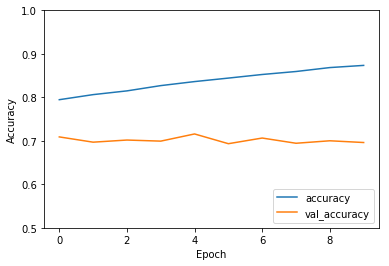

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

#Si tienen problemas ejecutando esta grágica, proceder con los dos cambios hechos que están más abajo:

In [ ]:
import matplotlib.pyplot as plt
# plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['accuracy'], label='accuracy')
#plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [37]:
print(test_acc)

0.6961
